This is my second attempt at an Image Classification problem. You can read about the first (failed) attempt here.[//Add a link here]

One of the smaller problems moving from one part of the world to a different part of the world has been losing the ability to ID cars.

Lets see if I can train a learner to do a better job than me. 

I want to start with distinguising between two models of cars due to two reasons:
1. I think having a simpler case is easier than delving head-first into the complex case of id-ing between 100 different cars. 
2. I am not exactly sure if this would work.

This time, instead of making my own dataset I will use Google Images. This data will have lots of noise, but hopefully it will be accurate enough to have some quality in its results. 

In [1]:
from fastai.vision import *

After importing the library is out of the way - lets focus on which cars to ID. 

According to a quick google search, the two most popular Canadian cars(sedans) are the Honda Civic and the Toyota Corolla. I know I said I would work with cars, but I think its easier to differentiate between a sedan and a pick-up because of diferent shapes so we will be using similar cars and see where we get. 


Lets get our data!

In [3]:
folder = 'corolla'
file = 'url_corolla.txt'

In [8]:
folder = 'civic'
file = 'url_civic.txt'

In [9]:
path = Path('data/cars')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [10]:
path.ls()

[PosixPath('data/cars/civic'),
 PosixPath('data/cars/url_corolla.txt'),
 PosixPath('data/cars/corolla')]

In [11]:
classes = ['corolla', 'civic']

In [13]:
download_images(path/file, dest, max_pics=200)

In [14]:
for c in classes:
    print(c)
    verify_images(path/c,delete=True,max_size=500)

corolla


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA imag

cannot identify image file <_io.BufferedReader name='data/cars/corolla/00000047.jpg'>
cannot identify image file <_io.BufferedReader name='data/cars/corolla/00000186.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


cannot identify image file <_io.BufferedReader name='data/cars/corolla/00000062.jpg'>
cannot identify image file <_io.BufferedReader name='data/cars/corolla/00000101.jpeg'>
civic


cannot identify image file <_io.BufferedReader name='data/cars/civic/00000060.jpg'>
cannot identify image file <_io.BufferedReader name='data/cars/civic/00000120.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


cannot identify image file <_io.BufferedReader name='data/cars/civic/00000134.jpg'>
cannot identify image file <_io.BufferedReader name='data/cars/civic/00000146.jpg'>


In [15]:
np.random.seed(57)

In [16]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [17]:
data.classes

['civic', 'corolla']

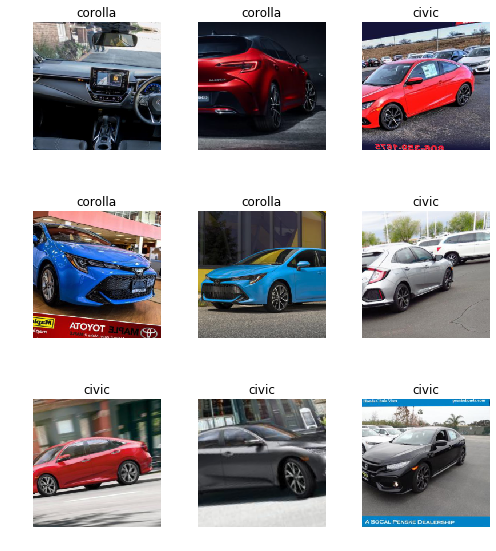

In [18]:
data.show_batch(rows=3, figsize=(7,8))

In [19]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['civic', 'corolla'], 2, 308, 76)

Notice from when we use show data, the images are not exactly the greatest for learning. In hindsight (20/20), I should have instead queried for "2019 Toyota Corolla Front" which displays at least the front images which is what actually differs in these cars at least to my eye, but maybe I am just bad at Id-ing cars and resNet will do better. *drumroll* here we go.

In [20]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [21]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.011363,1.530479,0.578947,00:06
1,0.861522,1.246202,0.500000,00:03
2,0.738689,0.684521,0.328947,00:03
3,0.669081,0.508695,0.197368,00:03


That is... unexpectedly more accurate than what I assumed it would be. It would be interesting to see the top losses to see where the learner falters. and if this is reprodcuible and if we can do better. It is doing way better than me, that's for sure.

TODO: Experiment in the future between two cars that have the same manufacturer. i.e. two Honda cars and see how we do. Maybe the model is picking up on the Company mascot in front of the car, which would make the learners job so much more easier.

In [22]:
learn.save('2019 corolla vs civic stage 1')

In [23]:
learn.unfreeze()

In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


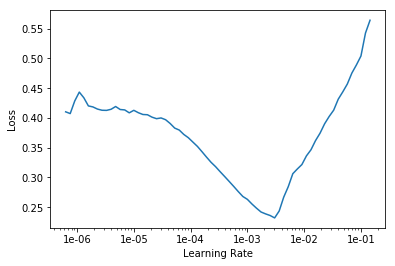

In [25]:
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(2, max_lr=slice(3e-4,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.557937,1.891149,0.315789,00:03
1,0.470590,0.660832,0.157895,00:03


In [27]:
learn.save('Stage 2 does better')

So after the most basic fine-tuning I know, we see that the model performs 4% better. Lets now try to interpret this data.

In [28]:
learn.load('Stage 2 does better');

Learner(data=ImageDataBunch;

Train: LabelList (308 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
civic,civic,civic,civic,civic
Path: data/cars;

Valid: LabelList (76 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
corolla,corolla,civic,civic,civic
Path: data/cars;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_st

In [29]:
interp = ClassificationInterpretation.from_learner(learn)

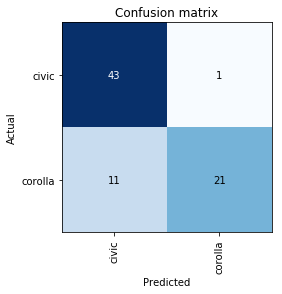

In [30]:
interp.plot_confusion_matrix()

So looking at this from the most obvious perspective, the learner does a great job of ID-ing a civic, but a poor job with the corollas. Don't know what to attribute this to. Are the images for the 2019 Toyota Corollas just inherently bad. 

// TODO: use image cleaner on this project to see if we can do better.


TODO: Export the learner and infer from an actual picture you take.